In [579]:
import collections
import math
import os
import zipfile

import numpy as np
from six.moves import urllib
import tensorflow as tf


# batch size >=2 는 구현 못하겟다

In [580]:
url = 'http://mattmahoney.net/dc/'


def maybe_download(filename, expected_bytes):
    """Download a file if not present, and make sure it's the right size."""
    if not os.path.exists(filename):
        filename, _ = urllib.request.urlretrieve(url + filename, filename)
    statinfo = os.stat(filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', filename)
    else:
        print(statinfo.st_size)
        raise Exception('Failed to verify ' + filename + '. Can you get to it with a browser?')
    return filename

filename = maybe_download('text8.zip', 31344016)


def read_data(filename):
    ''' zip 파일에 포함된 텍스트 파일을 읽어서 단어 리스트 생성. 포함된 파일은 1개. 
    zip 파일은 30mb, txt 파일은 100mb. '''
    with zipfile.ZipFile(filename) as f:
        names = f.namelist()                # ['text8']
        contents = f.read(names[0])         # 크기 : 100,000,000바이트
        text = tf.compat.as_str(contents)   # 크기 : 100,000,000
        return text.split()                 # 갯수 : 17005207


vocabulary = read_data(filename)
print('Data size', len(vocabulary))   

# .을 기준으로 리스트 여러개로 나눈후에 space로 다시 리스트로 나눈다.
# I like you. you like me -> [[I like you], [you like me]] -> [[[I] [like] [you]], ... ]

Found and verified text8.zip
Data size 17005207


In [585]:
def word_numbering(vocabulary, number_of_n_words=50000):
    """
    Arguments:
    vocabulary -- a list of words you want to train the word2vec
    number_of_n_words -- number of most frequent n words in the vocabulary you want to set
    
    Returns:
    int_voc -- a list of vocabulary that is mapped into integer-valeud index
    word_to_int -- python dict mapping words in the vocabulary into an integer-valued index
    int_to_word -- python dict mapping integer-valued index to words
    most_frequent_n_words -- a list with pairs of n most frequent words with its frequency -> [(word, frequency)]
    """
    word_count = collections.Counter(vocabulary)
    most_frequent_n_words = word_count.most_common(number_of_n_words - 1)
            
    word_to_int = {'UNK': 0} # set 0 as unknown token
    for word, _ in most_frequent_n_words:
        word_to_int[word] = len(word_to_int)
    
    int_to_word = {v: k for k, v in word_to_int.items()} # reverse dict of word_to_int


    count = 0
    int_voc = []

    for word in vocabulary:
        if word in word_to_int: # if word is in n most frequent words
            int_voc.append(word_to_int[word]) #. change the word into the corresponding integer
        else:
            int_voc.append(0) # not in the n most frequent word.
            count += 1   # number of words that are not in n most frequent words
 
    most_frequent_n_words.insert(0, ('UNK', count))
    #most_frequent_n_words = np.insert(most_frequent_n_words, 0,('UNK', count),axis=0)
            
    return int_voc, word_to_int, int_to_word, most_frequent_n_words
    
# del vocabulary

In [586]:
# For the test
int_voc, word_to_int, int_to_word, most_frequent_n_words = word_numbering(vocabulary)

In [ ]:
def compute_f(most_frequent_n_words):
    """
    Arguments:
    
    Returns:
    """
    total = sum([most_frequent_n_words[x][1] for x in range(len(most_frequent_n_words))]) # compute the vocabulary len.
    
    
    return f

In [ ]:
def subsampling(int_voc, most_frequent_n_words, word, t=0.00001):
    """
    Arguments:
    most_frequent_n_words --
    t --
    
    Returns:
    p_w_i
    """
    
    

In [ ]:
def create_mini_batch(int_voc, batch_size, window_size, num_context_word, start_x, start_y):
    """
    Create mini batch size of batch_size with each batch containing num_target_word training examples.
    
    Arguments:
    data -- a list of vocabulary that is mapped into integer-valeud index
    batch_size -- size of batch in stochastic gradient descent
    window_size -- size of window around the target word.
    num_context_word --
    
    Returns:
    start_x
    start_y
    """
    int_voc = [int_voc] # this will deleted if the input includes punctuation
    
    assert (start_y < len(int_voc[start_x]))

    for i in range(batch_size / num_context_word):
        start = max(0, start_y - window_size) 
        end = min(start_y + window_size, len(int_voc[start_x]) - 1)
    
    

In [587]:
# Step 3: skip-gram 모델에 사용할 학습 데이터를 생성할 함수 작성

# 원본에서는 data_index를 전역변수로 처리했는데, 여기서는 매개변수와 반환값으로 변경했다.
# data 변수 또한 전역변수였는데, 첫 번째 매개변수로 전달하도록 변경했다.
def generate_batch(data, batch_size, num_skips, skip_window, data_index):
    ''' Stochastic Gradient Descent 알고리즘에 사용할 minibatch 생성.
    :param data : 단어 인덱스 리스트
    :param batch_size : SGD 알고리즘에 적용할 데이터 갯수. 한 번에 처리할 크기.
    :param num_skips : context window에서 구축할 (target, context) 쌍의 갯수.
    :param skip_window : skip-gram 모델에 사용할 윈도우 크기.
         1이라면 목표 단어(target) 양쪽에 1개 단어이므로 context window 크기는 3이 된다. (단어, target, 단어)
         2라면 5가 된다. (단어 단어 target 단어 단어)
    :param data_index : 첫 번째 context window에 들어갈 data에서의 시작 위치.
    '''
    
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window

    temp = 'batch_size {}, num_skips {}, skip_window {}, data_index {}'

    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size), dtype=np.int32)

    # span은 assert에 기술한 코드 때문에 항상 num_skips보다 크다.
    span = 2 * skip_window + 1                      # context = skip_window + target + skip_window
    assert span > num_skips

    buffer = collections.deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)   # 다음 단어 인덱스로 이동. len(data) = 17005207


    # batch_size는 num_skips로 나누어 떨어지기 때문에 정확하게 batch_size만큼 반복
    for i in range(batch_size // num_skips):

        # 여기서는 항상 skip_window는 1, num_skips는 2의 값을 갖는다.
        targets = list(range(span))     # 1. 0부터 span-1까지의 정수로 채운 다음
        targets.pop(skip_window)        # 2. skip_window번째 삭제
        np.random.shuffle(targets)      # 3. 난수를 사용해서 섞는다.

        # batch : target 단어만 들어가고, num_skips만큼 같은 단어가 중복된다.
        # labels : target을 제외한 단어만 들어가고, num_skips만큼 중복될 수 있다.
        start = i * num_skips
        batch[start:start+num_skips] = buffer[skip_window]

        # span이 큰 값이기 때문에 targets에 포함된 모든 값을 사용하지 않을 수 있다.
        # buffer는 numpy 데이터가 아니라서 슬라이스 연산 불가. 어쩔 수 없이 반복문 사용.
        # numpy 배열을 사용하면서 마지막에 있는 num_skips 갯수만큼 사용하는 것이 나을 수도 있다.
        for j in range(num_skips):
            labels[start+j] = buffer[targets[j]]
            # print(targets[j], '**')     # (2, 0), (0, 2), (0, 2), (0, 2)

        # 새로운 요소가 들어가면서 가장 먼저 들어간 데이터 삭제
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)

    data_index = (data_index + len(data) - span) % len(data)
    return batch, labels, data_index


# generate_batch 함수 테스트. 아래 코드는 뒤쪽에서 사용하지 않는다.
batch, labels, data_index = generate_batch(data, batch_size=1, num_skips=1, skip_window=1, data_index=0)
for i in range(1):
    print('{} {} -> {} {}'.format(batch[i],     ordered_words[batch[i]],
                                  labels[i], ordered_words[labels[i]]))
# [출력 결과]
# 3081 originated -> 12 as
# 3081 originated -> 5234 anarchism
# 12 as -> 6 a
# 12 as -> 3081 originated
# 6 a -> 195 term
# 6 a -> 12 as
# 195 term -> 2 of
# 195 term -> 6 a

3081 originated -> 5234 anarchism


In [588]:
batch, labels, data_index = generate_batch(data, batch_size=1, num_skips=1, skip_window=1, data_index=0)



In [265]:
for i in range(1):
    print('{} {} -> {} {}'.format(batch[i],     ordered_words[batch[i]],
                                  labels[i], ordered_words[labels[i]]))

3081 originated -> 5234 anarchism


In [589]:
def parameter_initialization(vocabulary_size, projection_size):
    """
    Initialization method can be changed. 
    
    Argument:
    vocabulary_size -- the size of the vocabulary
    projection_size -- the dimension of hidden layer in NN
    
    Return:
    parameters -- a python dictionary containing weights W_in, b_in, W_out, b_out
    """
    
    np.random.seed(0)
    parameters = {}
    
    parameters['W_in'] = np.random.randn(vocabulary_size, projection_size) * 0.01 
    # parameters["b_in"] = np.zeros((projection_size, 1))
    
    parameters['W_out'] = np.random.randn(projection_size, vocabulary_size) * 0.01
    # parameters['b_out'] = np.zeros((vocabulary_size, 1))
    
    assert (parameters['W_in'].shape == (vocabulary_size, projection_size))
    assert (parameters['W_out'].shape == (projection_size, vocabulary_size))
    
        
    return parameters

In [590]:
def sigmoid(z):
    """
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    sig -- numpy array of sigmoid(z)
    """
    
    sig = 1/(1 + np.exp(-z))
    
    return sig

In [623]:
def compute_cost(batch, labels, parameters, is_pos):
    """
    Arguments:
    batch -- 1로 가정하자.
    labels --
    parameters --
    is_pos -- if "pos", compute np.multiply(out, hidden), if "neg" compute -np.multiply(out, hidden)
    Returns:
    """
    assert(batch.shape==labels.shape)
    W_in = parameters["W_in"]
    W_out = parameters["W_out"]
    
    hidden = W_in.T[:,batch]
    out = W_out[:, labels]
    if is_pos == "pos":
        cost = np.sum(np.multiply(out, hidden),axis=0)
    elif is_pos == "neg":
        cost = - np.sum(np.multiply(out, hidden),axis=0)
    cost = sigmoid(cost)
    cost = -np.log(cost)
    
    assert (hidden.shape == (W_in.shape[1], len(batch)))
    assert (out.shape == (W_in.shape[1], len(batch)))
    assert (cost.shape == (len(batch),))
    
    return cost

In [624]:
def feed_forward_NN(batch, labels, k, parameters):
    """    
    Arguments:
    batch-- input of Neural Network of shape (batch_size, ) size = 1 로 가정하자
    labels -- a list containing the true labeled output of shape (batch_size, )
    k -- number of negative sampling
    parameters -- python dictionary containing weights W_in, b_in, W_out, b_out
    
    Returns:
    cost -- the cost function of the NN
    caches -- used in backpropagation
    """
    positive = compute_cost(batch, labels, parameters, "pos")
    for i, label_word in enumerate(batch):
        # This will be replaced with the noise distriution Pn(W)
        negative_samples = np.random.randint(50000, size=k) # for now, just random negative sampling
        neg_batch = np.array([label_word for _ in range (k)])
        negs = negative_samples # batch size가 바뀌면 수정되야하는 부분
        
        assert (negative_samples.shape == neg_batch.shape)
        
        neg = np.sum(compute_cost(neg_batch, negative_samples, parameters, "neg"))
        positive[i] = positive[i] + neg 
        
    cost = np.mean(positive)
    assert(cost.shape == ())
    return cost, negs

# negative sampling 도 return 해야 할것 같다? ?


In [625]:
def backpropagation(batch, labels, negs, parameters, learning_rate=0.01):
    """
    Arguments:
    
    Returns:
    grads -- the value of gradient descent
    """
    W_in = parameters['W_in']
    W_out = parameters['W_out']
    hidden = W_in.T[:, batch] # shape: (100, 1)
    
    out = W_out[:, labels] # shape: (100,1)
    neg_out = W_out[:, negs] # shape: (100, k)
    
    k = len(negs)
    
    out_sig = sigmoid(np.sum(np.multiply(out, hidden),axis=0)) - 1
    out_neg_sig = sigmoid(np.sum(np.multiply(neg_out, hidden),axis=0, keepdims=True)) # (1,100) 여기 뭔가 문제있는데?
    
    assert(out_neg_sig.shape == (1, k))
    s = np.sum(out_neg_sig * neg_out, axis=1, keepdims=True)
    t = np.multiply(out_sig, out)
    assert(s.shape==t.shape)
    grads_in = s+t
    
    grads_out = (out_sig) * hidden  # hidden (100, 1)
    grads_neg_out = (out_neg_sig) *  hidden
            
    # update should be done at the same time 
    W_in[batch,:] = W_in[batch,:] - learning_rate * grads_in.T
    W_out[:, labels] = W_out[:, labels] - learning_rate * grads_out
    W_out[:, negs] = W_out[:, negs] - learning_rate * grads_neg_out
    
    return parameters

In [637]:
hidden = np.array([[1],[2],[3]]) # (3,1)
hidden[[0,2], :]  = [5]
hidden

array([[5],
       [2],
       [5]])

In [627]:
def negative_sampling():
    pass

In [628]:
def update_parameters(parameters, grads, learning_rate):
    """
    Updates the parameters based on adaGradientDescent with learning rate decay
    Arguments:
    parameters -- python dict containing parameters before the updates
    grads -- python dict containing the gradient
    Returns:
    parameters -- python dict containing updated parameters 
    """
    pass
    

In [643]:
def train(vocabulary, projection_size, num_of_n_words, epoch, learning_rate):
    
    vocabulary_size = 50000
    parameters = parameter_initialization(vocabulary_size, projection_size)
    
    # int_voc, word_to_int, int_to_word, most_frequent_n_words = word_numbering(vocabulary)
    data, count, ordered_words = build_dataset(vocabulary, vocabulary_size)
    
    data_index = 0
    for i in range(epoch):
        batch, labels, data_index = generate_batch(data, 1,1, 1, data_index)
        cost, negs = feed_forward_NN(batch,labels, 20, parameters)
        # learning_rate = learning_rate / (1 + 0.01* epcoh_num) 
        parameters = backpropagation(batch, labels, negs, parameters, learning_rate)
        
        if i % 100 == 0:
            print("The cost at:", i,"th iteration is",cost)
    
    return parameters

In [648]:
parameters=train(vocabulary, 1000, 50000, 1000000, 0.1)

The cost at: 0 th iteration is 14.5597198464
The cost at: 100 th iteration is 14.5558868744
The cost at: 200 th iteration is 14.5530281527
The cost at: 300 th iteration is 14.55521293
The cost at: 400 th iteration is 14.5529755463
The cost at: 500 th iteration is 14.5570622594
The cost at: 600 th iteration is 14.5704465097
The cost at: 700 th iteration is 14.5586023396
The cost at: 800 th iteration is 14.544252133
The cost at: 900 th iteration is 14.5633619976
The cost at: 1000 th iteration is 14.5481630811
The cost at: 1100 th iteration is 14.5575555601
The cost at: 1200 th iteration is 14.5648827603
The cost at: 1300 th iteration is 14.556328457
The cost at: 1400 th iteration is 14.5607190802
The cost at: 1500 th iteration is 14.549193297
The cost at: 1600 th iteration is 14.5621645183
The cost at: 1700 th iteration is 14.5556517951
The cost at: 1800 th iteration is 14.554920883
The cost at: 1900 th iteration is 14.5549781269
The cost at: 2000 th iteration is 14.5582907016
The cost a

The cost at: 17000 th iteration is 13.7106338587
The cost at: 17100 th iteration is 13.0978363298
The cost at: 17200 th iteration is 9.55362928896
The cost at: 17300 th iteration is 6.59311936526
The cost at: 17400 th iteration is 14.5777141271
The cost at: 17500 th iteration is 5.45580972866
The cost at: 17600 th iteration is 12.1607697024
The cost at: 17700 th iteration is 2.19193323634
The cost at: 17800 th iteration is 0.947312186891
The cost at: 17900 th iteration is 6.86491524141
The cost at: 18000 th iteration is 6.24595558823
The cost at: 18100 th iteration is 2.0909184938
The cost at: 18200 th iteration is 5.76183647679
The cost at: 18300 th iteration is 13.2365881165
The cost at: 18400 th iteration is 4.11315880941
The cost at: 18500 th iteration is 0.611627225208
The cost at: 18600 th iteration is 10.8828843662
The cost at: 18700 th iteration is 11.7192853346
The cost at: 18800 th iteration is 5.99994822955
The cost at: 18900 th iteration is 11.3747380986
The cost at: 19000 

The cost at: 33800 th iteration is 0.566853072403
The cost at: 33900 th iteration is 1.89726474353
The cost at: 34000 th iteration is 0.383622444159
The cost at: 34100 th iteration is 0.315525326933
The cost at: 34200 th iteration is 0.231506447883
The cost at: 34300 th iteration is 5.56955340306
The cost at: 34400 th iteration is 5.63556363247
The cost at: 34500 th iteration is 0.484657708727
The cost at: 34600 th iteration is 4.27652461603
The cost at: 34700 th iteration is 3.77519817578
The cost at: 34800 th iteration is 14.575067261
The cost at: 34900 th iteration is 0.234676272692
The cost at: 35000 th iteration is 0.618099576398
The cost at: 35100 th iteration is 8.07139206764
The cost at: 35200 th iteration is 0.361374324239
The cost at: 35300 th iteration is 0.396886930913
The cost at: 35400 th iteration is 4.27654215721
The cost at: 35500 th iteration is 4.58528118168
The cost at: 35600 th iteration is 3.60238399089
The cost at: 35700 th iteration is 8.72285598904
The cost at:

The cost at: 50500 th iteration is 2.11927942033
The cost at: 50600 th iteration is 0.125473095119
The cost at: 50700 th iteration is 0.987813142255
The cost at: 50800 th iteration is 0.120859153005
The cost at: 50900 th iteration is 1.12948640005
The cost at: 51000 th iteration is 10.3333519708
The cost at: 51100 th iteration is 5.18419782721
The cost at: 51200 th iteration is 10.4013751447
The cost at: 51300 th iteration is 10.6303831685
The cost at: 51400 th iteration is 9.76134913766
The cost at: 51500 th iteration is 7.82977881274
The cost at: 51600 th iteration is 7.555821938
The cost at: 51700 th iteration is 9.11522033421
The cost at: 51800 th iteration is 14.599256329
The cost at: 51900 th iteration is 14.5285421631
The cost at: 52000 th iteration is 14.5884558436
The cost at: 52100 th iteration is 0.275005626387
The cost at: 52200 th iteration is 0.421294669614
The cost at: 52300 th iteration is 8.62473718993
The cost at: 52400 th iteration is 1.74229169512
The cost at: 52500

The cost at: 67300 th iteration is 11.6581923094
The cost at: 67400 th iteration is 0.417390066168
The cost at: 67500 th iteration is 0.303053593258
The cost at: 67600 th iteration is 1.80594400517
The cost at: 67700 th iteration is 14.3782146411
The cost at: 67800 th iteration is 7.50519124864
The cost at: 67900 th iteration is 0.143027485954
The cost at: 68000 th iteration is 0.850072215617
The cost at: 68100 th iteration is 8.57086500844
The cost at: 68200 th iteration is 8.617168228
The cost at: 68300 th iteration is 3.24958040373
The cost at: 68400 th iteration is 1.64692227823
The cost at: 68500 th iteration is 2.18497542925
The cost at: 68600 th iteration is 14.6840093776
The cost at: 68700 th iteration is 0.511192310609
The cost at: 68800 th iteration is 4.33499359971
The cost at: 68900 th iteration is 0.239975035245
The cost at: 69000 th iteration is 1.9993893778
The cost at: 69100 th iteration is 2.46337293898
The cost at: 69200 th iteration is 3.39258889067
The cost at: 6930

The cost at: 84100 th iteration is 2.53560080088
The cost at: 84200 th iteration is 2.83560991008
The cost at: 84300 th iteration is 2.39515590462
The cost at: 84400 th iteration is 5.4851218847
The cost at: 84500 th iteration is 1.44510793449
The cost at: 84600 th iteration is 0.424792023395
The cost at: 84700 th iteration is 0.221377696705
The cost at: 84800 th iteration is 6.36071072932
The cost at: 84900 th iteration is 0.698348443121
The cost at: 85000 th iteration is 1.68498960585
The cost at: 85100 th iteration is 14.5443602068
The cost at: 85200 th iteration is 4.56915930888
The cost at: 85300 th iteration is 5.63978474698
The cost at: 85400 th iteration is 0.119766664767
The cost at: 85500 th iteration is 0.582949839927
The cost at: 85600 th iteration is 0.199577520305
The cost at: 85700 th iteration is 9.32455934571
The cost at: 85800 th iteration is 0.045557961187
The cost at: 85900 th iteration is 0.36312530347
The cost at: 86000 th iteration is 1.44498904256
The cost at: 8

The cost at: 100900 th iteration is 1.50097776181
The cost at: 101000 th iteration is 14.6166319727
The cost at: 101100 th iteration is 1.18367512261
The cost at: 101200 th iteration is 2.66492179754
The cost at: 101300 th iteration is 4.73153053161
The cost at: 101400 th iteration is 14.4468907868
The cost at: 101500 th iteration is 0.855888060106
The cost at: 101600 th iteration is 0.122426744214
The cost at: 101700 th iteration is 14.3098555287
The cost at: 101800 th iteration is 0.9505465334
The cost at: 101900 th iteration is 4.60472741032
The cost at: 102000 th iteration is 0.28251811665
The cost at: 102100 th iteration is 0.327737021792
The cost at: 102200 th iteration is 0.789884864092
The cost at: 102300 th iteration is 2.62126444307
The cost at: 102400 th iteration is 0.143070177648
The cost at: 102500 th iteration is 14.6184167549
The cost at: 102600 th iteration is 14.5199893312
The cost at: 102700 th iteration is 3.27928270851
The cost at: 102800 th iteration is 2.45651353

The cost at: 117200 th iteration is 0.273131660794
The cost at: 117300 th iteration is 0.25928762664
The cost at: 117400 th iteration is 2.41556537795
The cost at: 117500 th iteration is 0.0950782004009
The cost at: 117600 th iteration is 2.9136208388
The cost at: 117700 th iteration is 0.282604724811
The cost at: 117800 th iteration is 1.15579346745
The cost at: 117900 th iteration is 4.26188658298
The cost at: 118000 th iteration is 4.82482380118
The cost at: 118100 th iteration is 1.00484290081
The cost at: 118200 th iteration is 1.40271735311
The cost at: 118300 th iteration is 5.26263180416
The cost at: 118400 th iteration is 6.15206606322
The cost at: 118500 th iteration is 2.78323942742
The cost at: 118600 th iteration is 0.141157806913
The cost at: 118700 th iteration is 2.01924746054
The cost at: 118800 th iteration is 0.0435833852236
The cost at: 118900 th iteration is 1.33412387491
The cost at: 119000 th iteration is 1.23496175639
The cost at: 119100 th iteration is 0.093867

The cost at: 133600 th iteration is 0.845206762149
The cost at: 133700 th iteration is 3.5888839002
The cost at: 133800 th iteration is 2.68669684408
The cost at: 133900 th iteration is 3.48998007987
The cost at: 134000 th iteration is 5.45430622124
The cost at: 134100 th iteration is 0.435163623005
The cost at: 134200 th iteration is 14.6595467728
The cost at: 134300 th iteration is 6.58445114185
The cost at: 134400 th iteration is 0.427026031731
The cost at: 134500 th iteration is 0.191968364158
The cost at: 134600 th iteration is 1.91817917548
The cost at: 134700 th iteration is 6.76707213147
The cost at: 134800 th iteration is 0.231872809287
The cost at: 134900 th iteration is 0.693735999875
The cost at: 135000 th iteration is 0.329514170687
The cost at: 135100 th iteration is 0.771049345292
The cost at: 135200 th iteration is 4.02527889443
The cost at: 135300 th iteration is 1.32511869839
The cost at: 135400 th iteration is 4.24915404094
The cost at: 135500 th iteration is 14.4660

The cost at: 150000 th iteration is 1.73233633775
The cost at: 150100 th iteration is 0.198773516191
The cost at: 150200 th iteration is 2.60960475321
The cost at: 150300 th iteration is 0.664699642714
The cost at: 150400 th iteration is 2.35083600904
The cost at: 150500 th iteration is 0.0682940083505
The cost at: 150600 th iteration is 0.298225250665
The cost at: 150700 th iteration is 14.4522892548
The cost at: 150800 th iteration is 0.539015811719
The cost at: 150900 th iteration is 4.09558845541
The cost at: 151000 th iteration is 4.13803175747
The cost at: 151100 th iteration is 0.445203940506
The cost at: 151200 th iteration is 0.45935958226
The cost at: 151300 th iteration is 3.76035264312
The cost at: 151400 th iteration is 5.88359157678
The cost at: 151500 th iteration is 0.709314262181
The cost at: 151600 th iteration is 0.456560184019
The cost at: 151700 th iteration is 0.305138128559
The cost at: 151800 th iteration is 5.06928033965
The cost at: 151900 th iteration is 0.69

The cost at: 166300 th iteration is 0.696015344008
The cost at: 166400 th iteration is 2.28112093292
The cost at: 166500 th iteration is 0.101938748358
The cost at: 166600 th iteration is 0.302738951159
The cost at: 166700 th iteration is 2.5226686132
The cost at: 166800 th iteration is 3.22909813648
The cost at: 166900 th iteration is 0.358746699649
The cost at: 167000 th iteration is 0.435456054233
The cost at: 167100 th iteration is 0.751829628719
The cost at: 167200 th iteration is 1.839817608
The cost at: 167300 th iteration is 4.44381432922
The cost at: 167400 th iteration is 4.74291287439
The cost at: 167500 th iteration is 3.29154261405
The cost at: 167600 th iteration is 0.0319110550952
The cost at: 167700 th iteration is 0.578706535639
The cost at: 167800 th iteration is 0.171182901714
The cost at: 167900 th iteration is 1.67689681646
The cost at: 168000 th iteration is 3.40629607491
The cost at: 168100 th iteration is 0.0542537432305
The cost at: 168200 th iteration is 0.231

The cost at: 182700 th iteration is 0.0368781804277
The cost at: 182800 th iteration is 0.955509828553
The cost at: 182900 th iteration is 3.02490392784
The cost at: 183000 th iteration is 1.5773157355
The cost at: 183100 th iteration is 2.36461402684
The cost at: 183200 th iteration is 1.21088296346
The cost at: 183300 th iteration is 10.7256988045
The cost at: 183400 th iteration is 2.85178371012
The cost at: 183500 th iteration is 0.167676721915
The cost at: 183600 th iteration is 1.26139193527
The cost at: 183700 th iteration is 0.970647624948
The cost at: 183800 th iteration is 2.73612446389
The cost at: 183900 th iteration is 2.50550245825
The cost at: 184000 th iteration is 0.586169025492
The cost at: 184100 th iteration is 0.142651113669
The cost at: 184200 th iteration is 8.59661415911
The cost at: 184300 th iteration is 0.993643428645
The cost at: 184400 th iteration is 1.28204476981
The cost at: 184500 th iteration is 1.0522376573
The cost at: 184600 th iteration is 4.211786

The cost at: 199100 th iteration is 1.29941174149
The cost at: 199200 th iteration is 1.34093662743
The cost at: 199300 th iteration is 4.03299310775
The cost at: 199400 th iteration is 0.155822493522
The cost at: 199500 th iteration is 1.36168297708
The cost at: 199600 th iteration is 4.13858604536
The cost at: 199700 th iteration is 2.24533490229
The cost at: 199800 th iteration is 0.171185924541
The cost at: 199900 th iteration is 0.971789410595
The cost at: 200000 th iteration is 0.286646282714
The cost at: 200100 th iteration is 4.44095576478
The cost at: 200200 th iteration is 1.53448353753
The cost at: 200300 th iteration is 0.0638892259785
The cost at: 200400 th iteration is 0.141680336849
The cost at: 200500 th iteration is 0.905541083428
The cost at: 200600 th iteration is 1.14119057264
The cost at: 200700 th iteration is 4.26225773074
The cost at: 200800 th iteration is 3.40294708532
The cost at: 200900 th iteration is 0.383291666881
The cost at: 201000 th iteration is 1.229

The cost at: 215500 th iteration is 0.287319430119
The cost at: 215600 th iteration is 4.28595045233
The cost at: 215700 th iteration is 4.07084458762
The cost at: 215800 th iteration is 1.80805352231
The cost at: 215900 th iteration is 3.73736237437
The cost at: 216000 th iteration is 2.25566734749
The cost at: 216100 th iteration is 0.162964246282
The cost at: 216200 th iteration is 0.0855350313367
The cost at: 216300 th iteration is 0.637424577684
The cost at: 216400 th iteration is 0.158497517604
The cost at: 216500 th iteration is 4.88608790491
The cost at: 216600 th iteration is 1.43881688497
The cost at: 216700 th iteration is 5.43017607295
The cost at: 216800 th iteration is 0.418749839366
The cost at: 216900 th iteration is 1.17625557722
The cost at: 217000 th iteration is 0.0425376920236
The cost at: 217100 th iteration is 2.35143684342
The cost at: 217200 th iteration is 5.7333215463
The cost at: 217300 th iteration is 2.12959998225
The cost at: 217400 th iteration is 1.1259

The cost at: 231800 th iteration is 1.66742904983
The cost at: 231900 th iteration is 0.0431050560131
The cost at: 232000 th iteration is 0.0232944452262
The cost at: 232100 th iteration is 1.05439878961
The cost at: 232200 th iteration is 2.09348346755
The cost at: 232300 th iteration is 1.4537443064
The cost at: 232400 th iteration is 0.158745504064
The cost at: 232500 th iteration is 5.76882062255
The cost at: 232600 th iteration is 0.826945768908
The cost at: 232700 th iteration is 1.10316265935
The cost at: 232800 th iteration is 3.60671068155
The cost at: 232900 th iteration is 0.344487085379
The cost at: 233000 th iteration is 0.389961402333
The cost at: 233100 th iteration is 0.334685847326
The cost at: 233200 th iteration is 2.85241336343
The cost at: 233300 th iteration is 0.0961830351331
The cost at: 233400 th iteration is 3.9170091584
The cost at: 233500 th iteration is 1.0209182988
The cost at: 233600 th iteration is 1.35259013851
The cost at: 233700 th iteration is 0.1230

The cost at: 248100 th iteration is 0.98663608076
The cost at: 248200 th iteration is 2.37425564182
The cost at: 248300 th iteration is 3.46476767573
The cost at: 248400 th iteration is 0.225077788946
The cost at: 248500 th iteration is 0.154399389379
The cost at: 248600 th iteration is 0.263172427387
The cost at: 248700 th iteration is 2.68343509208
The cost at: 248800 th iteration is 0.565321637032
The cost at: 248900 th iteration is 0.95740464178
The cost at: 249000 th iteration is 0.0779787033228
The cost at: 249100 th iteration is 0.324431589827
The cost at: 249200 th iteration is 3.02733962735
The cost at: 249300 th iteration is 4.28346347317
The cost at: 249400 th iteration is 0.835668035024
The cost at: 249500 th iteration is 0.406205959295
The cost at: 249600 th iteration is 3.20522074918
The cost at: 249700 th iteration is 0.711452096633
The cost at: 249800 th iteration is 4.13738405844
The cost at: 249900 th iteration is 2.78042167536
The cost at: 250000 th iteration is 0.06

The cost at: 264400 th iteration is 0.804635410446
The cost at: 264500 th iteration is 0.186007628771
The cost at: 264600 th iteration is 2.79905370726
The cost at: 264700 th iteration is 3.19601226126
The cost at: 264800 th iteration is 3.31037879917
The cost at: 264900 th iteration is 0.0488976735856
The cost at: 265000 th iteration is 2.607827292
The cost at: 265100 th iteration is 5.29991552772
The cost at: 265200 th iteration is 0.129750219653
The cost at: 265300 th iteration is 0.902760440407
The cost at: 265400 th iteration is 1.06417820035
The cost at: 265500 th iteration is 0.215068188135
The cost at: 265600 th iteration is 0.765846814879
The cost at: 265700 th iteration is 0.541473663785
The cost at: 265800 th iteration is 14.4270230552
The cost at: 265900 th iteration is 1.57152466088
The cost at: 266000 th iteration is 0.496497978576
The cost at: 266100 th iteration is 0.0493522771027
The cost at: 266200 th iteration is 4.29326570933
The cost at: 266300 th iteration is 4.85

The cost at: 280700 th iteration is 1.09076716127
The cost at: 280800 th iteration is 1.82994519598
The cost at: 280900 th iteration is 0.518126670495
The cost at: 281000 th iteration is 0.194270907998
The cost at: 281100 th iteration is 2.80380953182
The cost at: 281200 th iteration is 0.672803724731
The cost at: 281300 th iteration is 1.13056550576
The cost at: 281400 th iteration is 2.40692973811
The cost at: 281500 th iteration is 0.108871127391
The cost at: 281600 th iteration is 2.33231304642
The cost at: 281700 th iteration is 0.624903888014
The cost at: 281800 th iteration is 0.148805979683
The cost at: 281900 th iteration is 0.462748016945
The cost at: 282000 th iteration is 2.91301192701
The cost at: 282100 th iteration is 1.41873173181
The cost at: 282200 th iteration is 2.68917282299
The cost at: 282300 th iteration is 5.79812261841
The cost at: 282400 th iteration is 1.54181988586
The cost at: 282500 th iteration is 0.159897450202
The cost at: 282600 th iteration is 0.7289

The cost at: 297100 th iteration is 0.985566243945
The cost at: 297200 th iteration is 1.11434672601
The cost at: 297300 th iteration is 0.0977005599945
The cost at: 297400 th iteration is 2.15590848916
The cost at: 297500 th iteration is 0.266916136009
The cost at: 297600 th iteration is 1.35572877099
The cost at: 297700 th iteration is 3.8986877487
The cost at: 297800 th iteration is 0.0426865559331
The cost at: 297900 th iteration is 1.61475008908
The cost at: 298000 th iteration is 0.159191516631
The cost at: 298100 th iteration is 0.0360150124207
The cost at: 298200 th iteration is 0.0426538092531
The cost at: 298300 th iteration is 1.90487069629
The cost at: 298400 th iteration is 3.60125729873
The cost at: 298500 th iteration is 4.57132266514
The cost at: 298600 th iteration is 0.778456563411
The cost at: 298700 th iteration is 0.384219719921
The cost at: 298800 th iteration is 2.59571055974
The cost at: 298900 th iteration is 2.34493048726
The cost at: 299000 th iteration is 1.

The cost at: 313400 th iteration is 1.39333957988
The cost at: 313500 th iteration is 0.274912486565
The cost at: 313600 th iteration is 0.952098933049
The cost at: 313700 th iteration is 0.284687923911
The cost at: 313800 th iteration is 2.5546923295
The cost at: 313900 th iteration is 3.96741779619
The cost at: 314000 th iteration is 0.313663193094
The cost at: 314100 th iteration is 3.22871824577
The cost at: 314200 th iteration is 1.27531724764
The cost at: 314300 th iteration is 5.69430335215
The cost at: 314400 th iteration is 0.603901727559
The cost at: 314500 th iteration is 0.138157671218
The cost at: 314600 th iteration is 0.605437876801
The cost at: 314700 th iteration is 0.423990472522
The cost at: 314800 th iteration is 0.300445403483
The cost at: 314900 th iteration is 1.32343855738
The cost at: 315000 th iteration is 0.816639865266
The cost at: 315100 th iteration is 0.355229242094
The cost at: 315200 th iteration is 1.0845644504
The cost at: 315300 th iteration is 0.466

The cost at: 329700 th iteration is 0.156502230248
The cost at: 329800 th iteration is 3.79044652708
The cost at: 329900 th iteration is 0.793164458717
The cost at: 330000 th iteration is 0.0884970995775
The cost at: 330100 th iteration is 3.9478504117
The cost at: 330200 th iteration is 0.21748157202
The cost at: 330300 th iteration is 3.1236521164
The cost at: 330400 th iteration is 3.94139033332
The cost at: 330500 th iteration is 0.0918536559688
The cost at: 330600 th iteration is 3.27598500335
The cost at: 330700 th iteration is 2.12401913834
The cost at: 330800 th iteration is 0.374018173613
The cost at: 330900 th iteration is 1.58741818652
The cost at: 331000 th iteration is 0.536068665147
The cost at: 331100 th iteration is 0.113518283534
The cost at: 331200 th iteration is 0.712718897596
The cost at: 331300 th iteration is 0.0662943348565
The cost at: 331400 th iteration is 0.477856677949
The cost at: 331500 th iteration is 1.97490129977
The cost at: 331600 th iteration is 0.2

The cost at: 346000 th iteration is 4.62797725873
The cost at: 346100 th iteration is 0.71329726624
The cost at: 346200 th iteration is 1.5315599228
The cost at: 346300 th iteration is 3.02277450406
The cost at: 346400 th iteration is 2.74040074258
The cost at: 346500 th iteration is 2.58927826638
The cost at: 346600 th iteration is 0.295122516067
The cost at: 346700 th iteration is 1.39437281905
The cost at: 346800 th iteration is 0.929679196699
The cost at: 346900 th iteration is 0.615886025189
The cost at: 347000 th iteration is 3.13442033665
The cost at: 347100 th iteration is 0.474695681367
The cost at: 347200 th iteration is 0.837944891641
The cost at: 347300 th iteration is 2.17289260813
The cost at: 347400 th iteration is 4.53812138553
The cost at: 347500 th iteration is 14.5926636191
The cost at: 347600 th iteration is 0.590247712754
The cost at: 347700 th iteration is 2.1143781925
The cost at: 347800 th iteration is 1.19652854349
The cost at: 347900 th iteration is 4.21920881

The cost at: 362300 th iteration is 14.6713935072
The cost at: 362400 th iteration is 0.277167435772
The cost at: 362500 th iteration is 0.93129887962
The cost at: 362600 th iteration is 0.260712910611
The cost at: 362700 th iteration is 0.853146639177
The cost at: 362800 th iteration is 2.13916229789
The cost at: 362900 th iteration is 2.4548641528
The cost at: 363000 th iteration is 0.195695068112
The cost at: 363100 th iteration is 14.4123195867
The cost at: 363200 th iteration is 0.545834304771
The cost at: 363300 th iteration is 0.930165174743
The cost at: 363400 th iteration is 1.53149299239
The cost at: 363500 th iteration is 0.298428018387
The cost at: 363600 th iteration is 1.02424952824
The cost at: 363700 th iteration is 1.92117732918
The cost at: 363800 th iteration is 1.1022910531
The cost at: 363900 th iteration is 8.71784770595
The cost at: 364000 th iteration is 0.142615411484
The cost at: 364100 th iteration is 0.0447620996206
The cost at: 364200 th iteration is 1.3877

The cost at: 378600 th iteration is 1.0010641944
The cost at: 378700 th iteration is 3.79564281819
The cost at: 378800 th iteration is 5.16069010827
The cost at: 378900 th iteration is 1.08065486856
The cost at: 379000 th iteration is 0.877913059674
The cost at: 379100 th iteration is 0.739044205844
The cost at: 379200 th iteration is 0.484223123578
The cost at: 379300 th iteration is 0.391293259342
The cost at: 379400 th iteration is 3.06565715069
The cost at: 379500 th iteration is 4.84729208217
The cost at: 379600 th iteration is 0.197084028484
The cost at: 379700 th iteration is 1.73980225081
The cost at: 379800 th iteration is 0.293183610486
The cost at: 379900 th iteration is 2.64976846844
The cost at: 380000 th iteration is 0.311749466757
The cost at: 380100 th iteration is 0.179560911495
The cost at: 380200 th iteration is 0.307317379557
The cost at: 380300 th iteration is 2.21793795908
The cost at: 380400 th iteration is 3.76919350867
The cost at: 380500 th iteration is 1.3295

The cost at: 394900 th iteration is 2.75482583824
The cost at: 395000 th iteration is 0.175972177787
The cost at: 395100 th iteration is 0.0446151432072
The cost at: 395200 th iteration is 0.300131002074
The cost at: 395300 th iteration is 0.0574370986726
The cost at: 395400 th iteration is 1.75376267405
The cost at: 395500 th iteration is 1.4503317371
The cost at: 395600 th iteration is 2.26903460028
The cost at: 395700 th iteration is 0.362813126932
The cost at: 395800 th iteration is 0.255607130978
The cost at: 395900 th iteration is 4.08056515079
The cost at: 396000 th iteration is 0.148973979017
The cost at: 396100 th iteration is 1.16285927393
The cost at: 396200 th iteration is 0.0619209892089
The cost at: 396300 th iteration is 0.510458304311
The cost at: 396400 th iteration is 1.69409474534
The cost at: 396500 th iteration is 6.08881416085
The cost at: 396600 th iteration is 1.53553603959
The cost at: 396700 th iteration is 0.09610181971
The cost at: 396800 th iteration is 5.6

The cost at: 411200 th iteration is 0.602808187134
The cost at: 411300 th iteration is 0.0237500615846
The cost at: 411400 th iteration is 5.2855371478
The cost at: 411500 th iteration is 1.00545816012
The cost at: 411600 th iteration is 0.371647383932
The cost at: 411700 th iteration is 0.145723781298
The cost at: 411800 th iteration is 1.06125699626
The cost at: 411900 th iteration is 1.44660654834
The cost at: 412000 th iteration is 1.61523391567
The cost at: 412100 th iteration is 5.38119804438
The cost at: 412200 th iteration is 0.300695833927
The cost at: 412300 th iteration is 0.490334767336
The cost at: 412400 th iteration is 14.4108548153
The cost at: 412500 th iteration is 0.284754909123
The cost at: 412600 th iteration is 0.512224037354
The cost at: 412700 th iteration is 1.43129037083
The cost at: 412800 th iteration is 0.932120299714
The cost at: 412900 th iteration is 0.195237023798
The cost at: 413000 th iteration is 0.166903921048
The cost at: 413100 th iteration is 14.

The cost at: 427500 th iteration is 0.0659956552447
The cost at: 427600 th iteration is 0.948036699
The cost at: 427700 th iteration is 3.17785481892
The cost at: 427800 th iteration is 3.23428342606
The cost at: 427900 th iteration is 2.63455138062
The cost at: 428000 th iteration is 1.22353218931
The cost at: 428100 th iteration is 1.67526663162
The cost at: 428200 th iteration is 0.157645171848
The cost at: 428300 th iteration is 0.42306796935
The cost at: 428400 th iteration is 0.8136408517
The cost at: 428500 th iteration is 0.383510396954
The cost at: 428600 th iteration is 0.158013832144
The cost at: 428700 th iteration is 2.32646786729
The cost at: 428800 th iteration is 0.465934632282
The cost at: 428900 th iteration is 1.61201327894
The cost at: 429000 th iteration is 0.127280671551
The cost at: 429100 th iteration is 1.12785011895
The cost at: 429200 th iteration is 1.98175464075
The cost at: 429300 th iteration is 0.965677207016
The cost at: 429400 th iteration is 1.4292774

The cost at: 443800 th iteration is 1.45733270817
The cost at: 443900 th iteration is 2.67568006633
The cost at: 444000 th iteration is 0.405066525088
The cost at: 444100 th iteration is 0.615037818565
The cost at: 444200 th iteration is 0.18662595551
The cost at: 444300 th iteration is 0.561658352289
The cost at: 444400 th iteration is 0.451322506948
The cost at: 444500 th iteration is 0.13466161248
The cost at: 444600 th iteration is 2.05143250157
The cost at: 444700 th iteration is 0.467089827828
The cost at: 444800 th iteration is 0.264668928965
The cost at: 444900 th iteration is 0.16008939895
The cost at: 445000 th iteration is 0.330550268286
The cost at: 445100 th iteration is 0.202527552521
The cost at: 445200 th iteration is 0.266419515713
The cost at: 445300 th iteration is 0.350866966909
The cost at: 445400 th iteration is 0.422313105868
The cost at: 445500 th iteration is 1.63306566516
The cost at: 445600 th iteration is 0.492712447413
The cost at: 445700 th iteration is 2.

The cost at: 460100 th iteration is 1.70291361122
The cost at: 460200 th iteration is 2.47353505243
The cost at: 460300 th iteration is 0.0410755920398
The cost at: 460400 th iteration is 0.654825550579
The cost at: 460500 th iteration is 0.215013694862
The cost at: 460600 th iteration is 0.111542599265
The cost at: 460700 th iteration is 1.51008239887
The cost at: 460800 th iteration is 0.964978136569
The cost at: 460900 th iteration is 2.76123328208
The cost at: 461000 th iteration is 4.23093744924
The cost at: 461100 th iteration is 0.806305540152
The cost at: 461200 th iteration is 0.264386899806
The cost at: 461300 th iteration is 0.496437926372
The cost at: 461400 th iteration is 1.86988390097
The cost at: 461500 th iteration is 0.223133343251
The cost at: 461600 th iteration is 3.73468622322
The cost at: 461700 th iteration is 0.199504231736
The cost at: 461800 th iteration is 0.141203679066
The cost at: 461900 th iteration is 1.90729009289
The cost at: 462000 th iteration is 0.

The cost at: 476300 th iteration is 5.16741164799
The cost at: 476400 th iteration is 5.10826741556
The cost at: 476500 th iteration is 0.257082487434
The cost at: 476600 th iteration is 5.48018943943
The cost at: 476700 th iteration is 2.54930106808
The cost at: 476800 th iteration is 3.9413259852
The cost at: 476900 th iteration is 0.436075714637
The cost at: 477000 th iteration is 6.04097575266
The cost at: 477100 th iteration is 4.60331344438
The cost at: 477200 th iteration is 0.454056259126
The cost at: 477300 th iteration is 0.0460545217691
The cost at: 477400 th iteration is 0.222157543385
The cost at: 477500 th iteration is 0.0699942632594
The cost at: 477600 th iteration is 0.200765541272
The cost at: 477700 th iteration is 0.476240107332
The cost at: 477800 th iteration is 1.01533098116
The cost at: 477900 th iteration is 0.244982886614
The cost at: 478000 th iteration is 2.32570288267
The cost at: 478100 th iteration is 2.0292989091
The cost at: 478200 th iteration is 0.763

The cost at: 492600 th iteration is 0.545848166084
The cost at: 492700 th iteration is 2.7709672724
The cost at: 492800 th iteration is 3.92365776168
The cost at: 492900 th iteration is 0.730678494077
The cost at: 493000 th iteration is 0.636699378059
The cost at: 493100 th iteration is 2.07840382688
The cost at: 493200 th iteration is 5.58519940342
The cost at: 493300 th iteration is 4.00920273677
The cost at: 493400 th iteration is 0.266470385772
The cost at: 493500 th iteration is 3.01569251031
The cost at: 493600 th iteration is 0.240813139547
The cost at: 493700 th iteration is 0.327040795299
The cost at: 493800 th iteration is 0.529035966881
The cost at: 493900 th iteration is 2.13553486167
The cost at: 494000 th iteration is 0.228995801844
The cost at: 494100 th iteration is 3.74637128771
The cost at: 494200 th iteration is 2.90441042316
The cost at: 494300 th iteration is 0.460690100762
The cost at: 494400 th iteration is 1.42107200219
The cost at: 494500 th iteration is 0.1331

The cost at: 508900 th iteration is 0.189904856795
The cost at: 509000 th iteration is 0.259450377372
The cost at: 509100 th iteration is 4.9373091568
The cost at: 509200 th iteration is 2.49052659466
The cost at: 509300 th iteration is 0.488405786039
The cost at: 509400 th iteration is 0.264208369838
The cost at: 509500 th iteration is 0.403586438768
The cost at: 509600 th iteration is 0.187485122445
The cost at: 509700 th iteration is 4.60064529077
The cost at: 509800 th iteration is 0.507899973189
The cost at: 509900 th iteration is 0.598871735355
The cost at: 510000 th iteration is 3.46917651395
The cost at: 510100 th iteration is 1.34801489277
The cost at: 510200 th iteration is 0.15919539877
The cost at: 510300 th iteration is 0.677062600265
The cost at: 510400 th iteration is 1.98331032186
The cost at: 510500 th iteration is 0.846543928603
The cost at: 510600 th iteration is 4.28313305136
The cost at: 510700 th iteration is 0.114904933595
The cost at: 510800 th iteration is 0.18

The cost at: 525200 th iteration is 0.412533834499
The cost at: 525300 th iteration is 5.26340397878
The cost at: 525400 th iteration is 0.896314474231
The cost at: 525500 th iteration is 0.0572948764577
The cost at: 525600 th iteration is 5.74642840003
The cost at: 525700 th iteration is 0.692060845573
The cost at: 525800 th iteration is 0.267816121409
The cost at: 525900 th iteration is 1.02380233699
The cost at: 526000 th iteration is 5.20723972716
The cost at: 526100 th iteration is 1.39505300621
The cost at: 526200 th iteration is 0.551573671255
The cost at: 526300 th iteration is 4.77867858654
The cost at: 526400 th iteration is 0.257184324158
The cost at: 526500 th iteration is 5.33183811592
The cost at: 526600 th iteration is 1.84927538622
The cost at: 526700 th iteration is 2.32166067059
The cost at: 526800 th iteration is 0.254196657671
The cost at: 526900 th iteration is 1.71909976531
The cost at: 527000 th iteration is 0.574435260788
The cost at: 527100 th iteration is 0.20

The cost at: 541500 th iteration is 0.0780459898025
The cost at: 541600 th iteration is 4.47731678035
The cost at: 541700 th iteration is 0.946892670003
The cost at: 541800 th iteration is 2.07949459158
The cost at: 541900 th iteration is 2.82900118582
The cost at: 542000 th iteration is 1.92277681167
The cost at: 542100 th iteration is 1.40910191104
The cost at: 542200 th iteration is 3.57030266013
The cost at: 542300 th iteration is 3.00901609458
The cost at: 542400 th iteration is 0.337904554179
The cost at: 542500 th iteration is 0.020618712584
The cost at: 542600 th iteration is 0.102013201866
The cost at: 542700 th iteration is 0.720168248247
The cost at: 542800 th iteration is 3.60714972769
The cost at: 542900 th iteration is 0.0718173316317
The cost at: 543000 th iteration is 5.2746115813
The cost at: 543100 th iteration is 0.068146827995
The cost at: 543200 th iteration is 1.20549184942
The cost at: 543300 th iteration is 0.829177215292
The cost at: 543400 th iteration is 14.6

The cost at: 557700 th iteration is 0.390089548427
The cost at: 557800 th iteration is 0.130727199995
The cost at: 557900 th iteration is 1.12551059082
The cost at: 558000 th iteration is 2.76544191011
The cost at: 558100 th iteration is 0.0592568707517
The cost at: 558200 th iteration is 2.51677451804
The cost at: 558300 th iteration is 6.36493830126
The cost at: 558400 th iteration is 0.0765940722646
The cost at: 558500 th iteration is 5.87609329463
The cost at: 558600 th iteration is 0.398296432804
The cost at: 558700 th iteration is 0.432478601451
The cost at: 558800 th iteration is 4.32323977316
The cost at: 558900 th iteration is 3.07782629927
The cost at: 559000 th iteration is 0.686661865568
The cost at: 559100 th iteration is 0.247332897139
The cost at: 559200 th iteration is 4.58415953375
The cost at: 559300 th iteration is 0.873910465741
The cost at: 559400 th iteration is 9.96592928053
The cost at: 559500 th iteration is 3.03938035127
The cost at: 559600 th iteration is 1.4

The cost at: 574000 th iteration is 5.16454285966
The cost at: 574100 th iteration is 0.775716827867
The cost at: 574200 th iteration is 0.245370979114
The cost at: 574300 th iteration is 0.120585480892
The cost at: 574400 th iteration is 0.334046934443
The cost at: 574500 th iteration is 4.3317299244
The cost at: 574600 th iteration is 0.668135975786
The cost at: 574700 th iteration is 2.21507437436
The cost at: 574800 th iteration is 0.13489322472
The cost at: 574900 th iteration is 0.0262002838802
The cost at: 575000 th iteration is 2.7357517359
The cost at: 575100 th iteration is 0.137631178383
The cost at: 575200 th iteration is 0.143498030181
The cost at: 575300 th iteration is 0.657522827426
The cost at: 575400 th iteration is 0.320454017288
The cost at: 575500 th iteration is 2.02718701434
The cost at: 575600 th iteration is 0.0434026045676
The cost at: 575700 th iteration is 0.115700471422
The cost at: 575800 th iteration is 2.5012467887
The cost at: 575900 th iteration is 0.1

The cost at: 590300 th iteration is 0.657215537037
The cost at: 590400 th iteration is 4.35029431625
The cost at: 590500 th iteration is 4.57111889361
The cost at: 590600 th iteration is 4.9879996621
The cost at: 590700 th iteration is 0.609951222388
The cost at: 590800 th iteration is 3.20464907368
The cost at: 590900 th iteration is 0.332762393331
The cost at: 591000 th iteration is 0.0291127229625
The cost at: 591100 th iteration is 1.75214327505
The cost at: 591200 th iteration is 5.08226128131
The cost at: 591300 th iteration is 3.72626944368
The cost at: 591400 th iteration is 2.50504970708
The cost at: 591500 th iteration is 3.32970482499
The cost at: 591600 th iteration is 1.81128065076
The cost at: 591700 th iteration is 5.60555046239
The cost at: 591800 th iteration is 0.677006572785
The cost at: 591900 th iteration is 2.88345336268
The cost at: 592000 th iteration is 4.07835435344
The cost at: 592100 th iteration is 5.23287037989
The cost at: 592200 th iteration is 0.7874507

The cost at: 606600 th iteration is 0.0633921778215
The cost at: 606700 th iteration is 0.735789520112
The cost at: 606800 th iteration is 0.116243482067
The cost at: 606900 th iteration is 1.59709020404
The cost at: 607000 th iteration is 2.62094518778
The cost at: 607100 th iteration is 4.48845270087
The cost at: 607200 th iteration is 1.9287042931
The cost at: 607300 th iteration is 1.06780687181
The cost at: 607400 th iteration is 0.796370253987
The cost at: 607500 th iteration is 0.396425130494
The cost at: 607600 th iteration is 0.104451156439
The cost at: 607700 th iteration is 0.168130648154
The cost at: 607800 th iteration is 0.102821898177
The cost at: 607900 th iteration is 0.307648181872
The cost at: 608000 th iteration is 0.195310808285
The cost at: 608100 th iteration is 5.14079232463
The cost at: 608200 th iteration is 0.527150066969
The cost at: 608300 th iteration is 0.381123397835
The cost at: 608400 th iteration is 3.37157625609
The cost at: 608500 th iteration is 1.

The cost at: 622900 th iteration is 2.55802747713
The cost at: 623000 th iteration is 0.113139027911
The cost at: 623100 th iteration is 2.5327266795
The cost at: 623200 th iteration is 1.48286634019
The cost at: 623300 th iteration is 1.97091167151
The cost at: 623400 th iteration is 0.127721648134
The cost at: 623500 th iteration is 1.58090894179
The cost at: 623600 th iteration is 0.546080156664
The cost at: 623700 th iteration is 0.0725661813963
The cost at: 623800 th iteration is 3.1506772003
The cost at: 623900 th iteration is 0.0336724126257
The cost at: 624000 th iteration is 1.31427580166
The cost at: 624100 th iteration is 0.309722211232
The cost at: 624200 th iteration is 0.18088084476
The cost at: 624300 th iteration is 0.523711603314
The cost at: 624400 th iteration is 2.77932900619
The cost at: 624500 th iteration is 1.6867018689
The cost at: 624600 th iteration is 0.555782127463
The cost at: 624700 th iteration is 2.12083781393
The cost at: 624800 th iteration is 4.54486

The cost at: 639200 th iteration is 4.24061976263
The cost at: 639300 th iteration is 1.52465833131
The cost at: 639400 th iteration is 0.740382003208
The cost at: 639500 th iteration is 0.348592295126
The cost at: 639600 th iteration is 0.897965096983
The cost at: 639700 th iteration is 8.76936471022
The cost at: 639800 th iteration is 2.53880441308
The cost at: 639900 th iteration is 0.735394336343
The cost at: 640000 th iteration is 0.0489824887226
The cost at: 640100 th iteration is 3.74925422669
The cost at: 640200 th iteration is 0.185932484592
The cost at: 640300 th iteration is 0.717311391954
The cost at: 640400 th iteration is 2.05547972576
The cost at: 640500 th iteration is 0.342063878362
The cost at: 640600 th iteration is 0.235587433081
The cost at: 640700 th iteration is 1.21921534298
The cost at: 640800 th iteration is 3.56026587807
The cost at: 640900 th iteration is 2.36338334357
The cost at: 641000 th iteration is 0.902102550461
The cost at: 641100 th iteration is 1.1

The cost at: 655500 th iteration is 0.456517524312
The cost at: 655600 th iteration is 0.581577104051
The cost at: 655700 th iteration is 0.832867346804
The cost at: 655800 th iteration is 1.21361822218
The cost at: 655900 th iteration is 0.412802957559
The cost at: 656000 th iteration is 1.29432025247
The cost at: 656100 th iteration is 1.28624083518
The cost at: 656200 th iteration is 4.74274683976
The cost at: 656300 th iteration is 3.87182058108
The cost at: 656400 th iteration is 1.45459033389
The cost at: 656500 th iteration is 0.372985504205
The cost at: 656600 th iteration is 0.0356020054251
The cost at: 656700 th iteration is 0.219773845594
The cost at: 656800 th iteration is 0.067165103001
The cost at: 656900 th iteration is 0.262431380374
The cost at: 657000 th iteration is 0.0712058623672
The cost at: 657100 th iteration is 0.489675804109
The cost at: 657200 th iteration is 5.31212744956
The cost at: 657300 th iteration is 0.953909551424
The cost at: 657400 th iteration is 

The cost at: 671800 th iteration is 1.37994628698
The cost at: 671900 th iteration is 0.099034758275
The cost at: 672000 th iteration is 0.352257780077
The cost at: 672100 th iteration is 0.652067517271
The cost at: 672200 th iteration is 0.326984051571
The cost at: 672300 th iteration is 0.0561384051469
The cost at: 672400 th iteration is 0.756994763006
The cost at: 672500 th iteration is 0.304300996103
The cost at: 672600 th iteration is 1.51082511609
The cost at: 672700 th iteration is 2.03121175946
The cost at: 672800 th iteration is 0.691157103268
The cost at: 672900 th iteration is 1.92619056854
The cost at: 673000 th iteration is 3.33506482532
The cost at: 673100 th iteration is 5.54989764906
The cost at: 673200 th iteration is 4.12649832268
The cost at: 673300 th iteration is 0.685992234088
The cost at: 673400 th iteration is 3.99758856325
The cost at: 673500 th iteration is 0.245110849677
The cost at: 673600 th iteration is 1.05597237483
The cost at: 673700 th iteration is 2.3

The cost at: 688100 th iteration is 2.20403859319
The cost at: 688200 th iteration is 4.36210003946
The cost at: 688300 th iteration is 0.522780722715
The cost at: 688400 th iteration is 0.213135797733
The cost at: 688500 th iteration is 0.377362350571
The cost at: 688600 th iteration is 0.663684802415
The cost at: 688700 th iteration is 0.437219087845
The cost at: 688800 th iteration is 0.148685225403
The cost at: 688900 th iteration is 1.33299205992
The cost at: 689000 th iteration is 2.03446806272
The cost at: 689100 th iteration is 1.10072701003
The cost at: 689200 th iteration is 1.86812260209
The cost at: 689300 th iteration is 0.223757982155
The cost at: 689400 th iteration is 0.897522684686
The cost at: 689500 th iteration is 1.30270211756
The cost at: 689600 th iteration is 0.359819507211
The cost at: 689700 th iteration is 0.521404711246
The cost at: 689800 th iteration is 2.88263957957
The cost at: 689900 th iteration is 2.84734209466
The cost at: 690000 th iteration is 0.17

The cost at: 704400 th iteration is 6.01689374567
The cost at: 704500 th iteration is 1.53761614714
The cost at: 704600 th iteration is 4.0030795318
The cost at: 704700 th iteration is 0.425781475123
The cost at: 704800 th iteration is 0.0214569118246
The cost at: 704900 th iteration is 0.484269046776
The cost at: 705000 th iteration is 1.09666942634
The cost at: 705100 th iteration is 2.5151805857
The cost at: 705200 th iteration is 1.37484839153
The cost at: 705300 th iteration is 1.73514339754
The cost at: 705400 th iteration is 0.802714886918
The cost at: 705500 th iteration is 0.107433114393
The cost at: 705600 th iteration is 0.172739039632
The cost at: 705700 th iteration is 0.221482614491
The cost at: 705800 th iteration is 4.08185386275
The cost at: 705900 th iteration is 0.167590706748
The cost at: 706000 th iteration is 2.23418341329
The cost at: 706100 th iteration is 0.356644049462
The cost at: 706200 th iteration is 1.43353196285
The cost at: 706300 th iteration is 0.1244

The cost at: 720700 th iteration is 0.781278279261
The cost at: 720800 th iteration is 4.18284377149
The cost at: 720900 th iteration is 3.33111354276
The cost at: 721000 th iteration is 1.43863624302
The cost at: 721100 th iteration is 0.0964644968297
The cost at: 721200 th iteration is 0.220199980169
The cost at: 721300 th iteration is 4.48455440475
The cost at: 721400 th iteration is 0.780418368035
The cost at: 721500 th iteration is 0.357436243459
The cost at: 721600 th iteration is 1.56999155734
The cost at: 721700 th iteration is 0.561844307722
The cost at: 721800 th iteration is 0.439821658737
The cost at: 721900 th iteration is 0.668475352696
The cost at: 722000 th iteration is 0.172083245158
The cost at: 722100 th iteration is 0.146323979036
The cost at: 722200 th iteration is 3.8307106296
The cost at: 722300 th iteration is 1.74812831224
The cost at: 722400 th iteration is 4.67191568176
The cost at: 722500 th iteration is 8.01463867555
The cost at: 722600 th iteration is 0.04

The cost at: 737000 th iteration is 1.08828545094
The cost at: 737100 th iteration is 0.413166130269
The cost at: 737200 th iteration is 0.817133295616
The cost at: 737300 th iteration is 1.24999275319
The cost at: 737400 th iteration is 0.480284619125
The cost at: 737500 th iteration is 0.0313966570377
The cost at: 737600 th iteration is 0.449231591814
The cost at: 737700 th iteration is 1.85395423976
The cost at: 737800 th iteration is 1.03134690356
The cost at: 737900 th iteration is 0.661538754536
The cost at: 738000 th iteration is 2.94539326732
The cost at: 738100 th iteration is 4.80948288238
The cost at: 738200 th iteration is 14.4113705922
The cost at: 738300 th iteration is 0.335418745586
The cost at: 738400 th iteration is 0.328135718882
The cost at: 738500 th iteration is 4.98118594904
The cost at: 738600 th iteration is 0.329355270073
The cost at: 738700 th iteration is 1.38530609462
The cost at: 738800 th iteration is 0.363759644958
The cost at: 738900 th iteration is 1.5

The cost at: 753200 th iteration is 0.665171926509
The cost at: 753300 th iteration is 0.428607065758
The cost at: 753400 th iteration is 0.0744297567226
The cost at: 753500 th iteration is 0.124244926747
The cost at: 753600 th iteration is 0.0733536698596
The cost at: 753700 th iteration is 0.440602779057
The cost at: 753800 th iteration is 0.621129915337
The cost at: 753900 th iteration is 0.190233460822
The cost at: 754000 th iteration is 0.529205572613
The cost at: 754100 th iteration is 0.222250989853
The cost at: 754200 th iteration is 0.0494407767614
The cost at: 754300 th iteration is 0.696022896588
The cost at: 754400 th iteration is 0.336154890421
The cost at: 754500 th iteration is 0.112791908764
The cost at: 754600 th iteration is 0.355273456761
The cost at: 754700 th iteration is 5.27500966113
The cost at: 754800 th iteration is 0.132458603307
The cost at: 754900 th iteration is 0.632357348516
The cost at: 755000 th iteration is 2.18875295832
The cost at: 755100 th iterati

The cost at: 769400 th iteration is 3.35954744882
The cost at: 769500 th iteration is 0.0708211194278
The cost at: 769600 th iteration is 0.38102640696
The cost at: 769700 th iteration is 0.0956226049857
The cost at: 769800 th iteration is 0.285078037544
The cost at: 769900 th iteration is 4.00360718301
The cost at: 770000 th iteration is 0.0435548834965
The cost at: 770100 th iteration is 0.0820936485102
The cost at: 770200 th iteration is 5.1765771762
The cost at: 770300 th iteration is 0.0646851271823
The cost at: 770400 th iteration is 0.170173174708
The cost at: 770500 th iteration is 0.0361951430299
The cost at: 770600 th iteration is 1.86335608309
The cost at: 770700 th iteration is 0.523613451601
The cost at: 770800 th iteration is 1.71238586721
The cost at: 770900 th iteration is 1.09317106247
The cost at: 771000 th iteration is 0.284410872981
The cost at: 771100 th iteration is 0.05406916803
The cost at: 771200 th iteration is 5.53792980706
The cost at: 771300 th iteration is

The cost at: 785600 th iteration is 0.202058790197
The cost at: 785700 th iteration is 0.289227216877
The cost at: 785800 th iteration is 0.0616971219556
The cost at: 785900 th iteration is 3.62698466659
The cost at: 786000 th iteration is 0.137349833479
The cost at: 786100 th iteration is 1.82405877369
The cost at: 786200 th iteration is 0.230389744572
The cost at: 786300 th iteration is 0.507990007152
The cost at: 786400 th iteration is 0.572436363333
The cost at: 786500 th iteration is 2.43444873423
The cost at: 786600 th iteration is 3.16359369942
The cost at: 786700 th iteration is 1.67118693352
The cost at: 786800 th iteration is 6.64866179185
The cost at: 786900 th iteration is 0.236376911123
The cost at: 787000 th iteration is 0.917754631301
The cost at: 787100 th iteration is 0.69427291662
The cost at: 787200 th iteration is 0.183171184205
The cost at: 787300 th iteration is 1.59275699567
The cost at: 787400 th iteration is 3.32426775869
The cost at: 787500 th iteration is 4.6

The cost at: 801900 th iteration is 0.197409651102
The cost at: 802000 th iteration is 5.71407983707
The cost at: 802100 th iteration is 0.171131687361
The cost at: 802200 th iteration is 0.820383606802
The cost at: 802300 th iteration is 0.281195882539
The cost at: 802400 th iteration is 4.01269885428
The cost at: 802500 th iteration is 4.44027745042
The cost at: 802600 th iteration is 0.0113980538486
The cost at: 802700 th iteration is 0.13878842157
The cost at: 802800 th iteration is 0.0998372497628
The cost at: 802900 th iteration is 0.173136566995
The cost at: 803000 th iteration is 0.539305541717
The cost at: 803100 th iteration is 5.66495625505
The cost at: 803200 th iteration is 0.356069935444
The cost at: 803300 th iteration is 0.0739702476346
The cost at: 803400 th iteration is 0.0401749372927
The cost at: 803500 th iteration is 14.7119636319
The cost at: 803600 th iteration is 0.37714993588
The cost at: 803700 th iteration is 0.131108500652
The cost at: 803800 th iteration i

The cost at: 818200 th iteration is 2.30721183126
The cost at: 818300 th iteration is 0.30613710204
The cost at: 818400 th iteration is 2.68810640035
The cost at: 818500 th iteration is 0.392691645609
The cost at: 818600 th iteration is 1.05052615065
The cost at: 818700 th iteration is 1.97934759112
The cost at: 818800 th iteration is 0.211230866502
The cost at: 818900 th iteration is 0.0908586796013
The cost at: 819000 th iteration is 0.900574220457
The cost at: 819100 th iteration is 0.335547658645
The cost at: 819200 th iteration is 2.04520598505
The cost at: 819300 th iteration is 2.88346380632
The cost at: 819400 th iteration is 2.21428464921
The cost at: 819500 th iteration is 1.15145982865
The cost at: 819600 th iteration is 1.40750096078
The cost at: 819700 th iteration is 0.103535880098
The cost at: 819800 th iteration is 0.52645204536
The cost at: 819900 th iteration is 4.10616490969
The cost at: 820000 th iteration is 0.197602340806
The cost at: 820100 th iteration is 0.2780

The cost at: 834500 th iteration is 1.41279283476
The cost at: 834600 th iteration is 0.535832094277
The cost at: 834700 th iteration is 2.74232459407
The cost at: 834800 th iteration is 0.548987862388
The cost at: 834900 th iteration is 14.5450547387
The cost at: 835000 th iteration is 0.457440706929
The cost at: 835100 th iteration is 0.681976576427
The cost at: 835200 th iteration is 0.333483026183
The cost at: 835300 th iteration is 2.80408762213
The cost at: 835400 th iteration is 0.671394064823
The cost at: 835500 th iteration is 0.938828819737
The cost at: 835600 th iteration is 1.25707186538
The cost at: 835700 th iteration is 2.31937934882
The cost at: 835800 th iteration is 0.0291753845245
The cost at: 835900 th iteration is 0.153714181042
The cost at: 836000 th iteration is 0.206890360464
The cost at: 836100 th iteration is 0.049669557828
The cost at: 836200 th iteration is 1.52205521477
The cost at: 836300 th iteration is 0.313929924839
The cost at: 836400 th iteration is 0

The cost at: 850800 th iteration is 3.34283468209
The cost at: 850900 th iteration is 0.375337684437
The cost at: 851000 th iteration is 0.155991607097
The cost at: 851100 th iteration is 1.34711011903
The cost at: 851200 th iteration is 0.113450429859
The cost at: 851300 th iteration is 1.85549766217
The cost at: 851400 th iteration is 0.124269712502
The cost at: 851500 th iteration is 0.549330492258
The cost at: 851600 th iteration is 4.24737308124
The cost at: 851700 th iteration is 0.325894210622
The cost at: 851800 th iteration is 0.502263999754
The cost at: 851900 th iteration is 0.438547835878
The cost at: 852000 th iteration is 0.720888013847
The cost at: 852100 th iteration is 6.91882259499
The cost at: 852200 th iteration is 0.140975345408
The cost at: 852300 th iteration is 0.194374122857
The cost at: 852400 th iteration is 0.671985833079
The cost at: 852500 th iteration is 14.5597820333
The cost at: 852600 th iteration is 4.89133421098
The cost at: 852700 th iteration is 0.

The cost at: 867100 th iteration is 4.29556198769
The cost at: 867200 th iteration is 0.0831064282313
The cost at: 867300 th iteration is 0.493058927038
The cost at: 867400 th iteration is 1.0384834386
The cost at: 867500 th iteration is 4.95834201749
The cost at: 867600 th iteration is 0.0547277831139
The cost at: 867700 th iteration is 0.108744946981
The cost at: 867800 th iteration is 0.578255248085
The cost at: 867900 th iteration is 6.95392044713
The cost at: 868000 th iteration is 0.129822996614
The cost at: 868100 th iteration is 1.62017875296
The cost at: 868200 th iteration is 0.0217633137042
The cost at: 868300 th iteration is 0.0705293437708
The cost at: 868400 th iteration is 0.0996174024641
The cost at: 868500 th iteration is 0.644636560798
The cost at: 868600 th iteration is 0.182883618619
The cost at: 868700 th iteration is 0.0489361256802
The cost at: 868800 th iteration is 0.0920193624004
The cost at: 868900 th iteration is 1.93975418768
The cost at: 869000 th iteratio

The cost at: 883400 th iteration is 0.149216905479
The cost at: 883500 th iteration is 0.0773104973564
The cost at: 883600 th iteration is 0.274836391256
The cost at: 883700 th iteration is 14.1087538511
The cost at: 883800 th iteration is 2.01998622258
The cost at: 883900 th iteration is 1.13529937502
The cost at: 884000 th iteration is 4.84851374835
The cost at: 884100 th iteration is 0.165306510328
The cost at: 884200 th iteration is 2.26011381527
The cost at: 884300 th iteration is 2.11845498175
The cost at: 884400 th iteration is 0.975607094369
The cost at: 884500 th iteration is 2.75386366358
The cost at: 884600 th iteration is 3.73761079406
The cost at: 884700 th iteration is 0.131910478204
The cost at: 884800 th iteration is 4.54951156509
The cost at: 884900 th iteration is 1.4604721507
The cost at: 885000 th iteration is 0.696559542645
The cost at: 885100 th iteration is 0.0735461490187
The cost at: 885200 th iteration is 0.1660731678
The cost at: 885300 th iteration is 0.1703

The cost at: 899700 th iteration is 0.104003141942
The cost at: 899800 th iteration is 0.437526181718
The cost at: 899900 th iteration is 3.32767724911
The cost at: 900000 th iteration is 0.537263271628
The cost at: 900100 th iteration is 0.182027031946
The cost at: 900200 th iteration is 4.2280321966
The cost at: 900300 th iteration is 3.66272659612
The cost at: 900400 th iteration is 0.15789665725
The cost at: 900500 th iteration is 0.040729712254
The cost at: 900600 th iteration is 1.4182038024
The cost at: 900700 th iteration is 0.0812481342271
The cost at: 900800 th iteration is 1.42962528587
The cost at: 900900 th iteration is 0.446165269484
The cost at: 901000 th iteration is 1.79066591807
The cost at: 901100 th iteration is 2.97093658737
The cost at: 901200 th iteration is 1.16511044397
The cost at: 901300 th iteration is 0.359065798161
The cost at: 901400 th iteration is 6.30556139418
The cost at: 901500 th iteration is 0.0495814299081
The cost at: 901600 th iteration is 5.551

The cost at: 916000 th iteration is 0.345392266287
The cost at: 916100 th iteration is 1.79742968197
The cost at: 916200 th iteration is 0.0519269351525
The cost at: 916300 th iteration is 0.144131287268
The cost at: 916400 th iteration is 3.9116381308
The cost at: 916500 th iteration is 0.0428595877559
The cost at: 916600 th iteration is 1.10965466637
The cost at: 916700 th iteration is 0.539931172735
The cost at: 916800 th iteration is 0.11773794333
The cost at: 916900 th iteration is 0.431585352282
The cost at: 917000 th iteration is 0.295320777981
The cost at: 917100 th iteration is 3.16012064439
The cost at: 917200 th iteration is 5.99828547069
The cost at: 917300 th iteration is 1.88644133004
The cost at: 917400 th iteration is 0.642651901207
The cost at: 917500 th iteration is 1.2828859657
The cost at: 917600 th iteration is 2.33821032999
The cost at: 917700 th iteration is 1.26534925591
The cost at: 917800 th iteration is 0.0940486155689
The cost at: 917900 th iteration is 2.14

The cost at: 932300 th iteration is 2.53582847489
The cost at: 932400 th iteration is 0.127240150733
The cost at: 932500 th iteration is 3.0965998553
The cost at: 932600 th iteration is 0.350476429005
The cost at: 932700 th iteration is 1.13611554258
The cost at: 932800 th iteration is 1.39211256142
The cost at: 932900 th iteration is 5.58243709783
The cost at: 933000 th iteration is 0.542963448473
The cost at: 933100 th iteration is 1.82916938944
The cost at: 933200 th iteration is 0.79244160578
The cost at: 933300 th iteration is 5.66560700802
The cost at: 933400 th iteration is 4.49897061052
The cost at: 933500 th iteration is 2.75760871572
The cost at: 933600 th iteration is 2.90129016345
The cost at: 933700 th iteration is 0.326775614916
The cost at: 933800 th iteration is 0.548812292872
The cost at: 933900 th iteration is 0.42603913088
The cost at: 934000 th iteration is 0.047760842545
The cost at: 934100 th iteration is 0.192839700883
The cost at: 934200 th iteration is 1.948268

The cost at: 948500 th iteration is 3.88524615067
The cost at: 948600 th iteration is 4.17020017462
The cost at: 948700 th iteration is 0.221614766867
The cost at: 948800 th iteration is 0.544477609256
The cost at: 948900 th iteration is 0.0315733260516
The cost at: 949000 th iteration is 0.161058221389
The cost at: 949100 th iteration is 0.0490031403597
The cost at: 949200 th iteration is 4.91834891987
The cost at: 949300 th iteration is 0.0590344376727
The cost at: 949400 th iteration is 14.5813969876
The cost at: 949500 th iteration is 0.47959289961
The cost at: 949600 th iteration is 5.58987380509
The cost at: 949700 th iteration is 0.362433783166
The cost at: 949800 th iteration is 2.94130176063
The cost at: 949900 th iteration is 0.112344334424
The cost at: 950000 th iteration is 0.182709081762
The cost at: 950100 th iteration is 1.30885411868
The cost at: 950200 th iteration is 4.22807571878
The cost at: 950300 th iteration is 4.16805544518
The cost at: 950400 th iteration is 0.

The cost at: 964800 th iteration is 0.483859161986
The cost at: 964900 th iteration is 2.19574429663
The cost at: 965000 th iteration is 0.0472928070551
The cost at: 965100 th iteration is 0.0127104305689
The cost at: 965200 th iteration is 0.235813728026
The cost at: 965300 th iteration is 2.65597790775
The cost at: 965400 th iteration is 0.0243672543232
The cost at: 965500 th iteration is 0.101654216823
The cost at: 965600 th iteration is 0.0402393116485
The cost at: 965700 th iteration is 0.381696389669
The cost at: 965800 th iteration is 14.6893486866
The cost at: 965900 th iteration is 0.0859131536181
The cost at: 966000 th iteration is 0.0188794499781
The cost at: 966100 th iteration is 2.6637342969
The cost at: 966200 th iteration is 0.0319880358758
The cost at: 966300 th iteration is 0.409520924243
The cost at: 966400 th iteration is 0.088484632348
The cost at: 966500 th iteration is 1.47955757721
The cost at: 966600 th iteration is 0.671301911319
The cost at: 966700 th iterati

The cost at: 981100 th iteration is 5.21530679014
The cost at: 981200 th iteration is 0.15107616571
The cost at: 981300 th iteration is 0.640000875003
The cost at: 981400 th iteration is 1.12547562719
The cost at: 981500 th iteration is 4.45241428782
The cost at: 981600 th iteration is 2.46261177543
The cost at: 981700 th iteration is 4.26237755441
The cost at: 981800 th iteration is 0.941185068848
The cost at: 981900 th iteration is 0.0901324144511
The cost at: 982000 th iteration is 0.946010973122
The cost at: 982100 th iteration is 3.27388219254
The cost at: 982200 th iteration is 0.0650578666099
The cost at: 982300 th iteration is 6.83914805128
The cost at: 982400 th iteration is 0.328966275814
The cost at: 982500 th iteration is 0.289038555128
The cost at: 982600 th iteration is 0.106542259165
The cost at: 982700 th iteration is 0.152838020302
The cost at: 982800 th iteration is 2.44002321519
The cost at: 982900 th iteration is 0.293719125418
The cost at: 983000 th iteration is 2.

The cost at: 997400 th iteration is 5.25724567062
The cost at: 997500 th iteration is 3.94594322907
The cost at: 997600 th iteration is 0.915323575468
The cost at: 997700 th iteration is 0.122705164664
The cost at: 997800 th iteration is 1.81328568662
The cost at: 997900 th iteration is 0.44878326479
The cost at: 998000 th iteration is 1.46197487276
The cost at: 998100 th iteration is 5.11755265267
The cost at: 998200 th iteration is 0.0858123349568
The cost at: 998300 th iteration is 2.61258334295
The cost at: 998400 th iteration is 3.59159874001
The cost at: 998500 th iteration is 0.365134618396
The cost at: 998600 th iteration is 2.58759358699
The cost at: 998700 th iteration is 0.113913616521
The cost at: 998800 th iteration is 0.221292628259
The cost at: 998900 th iteration is 0.0841419393775
The cost at: 999000 th iteration is 1.10007282515
The cost at: 999100 th iteration is 0.107779407486
The cost at: 999200 th iteration is 0.23751666921
The cost at: 999300 th iteration is 0.41

In [649]:
final_embeddings = parameters['W_in']

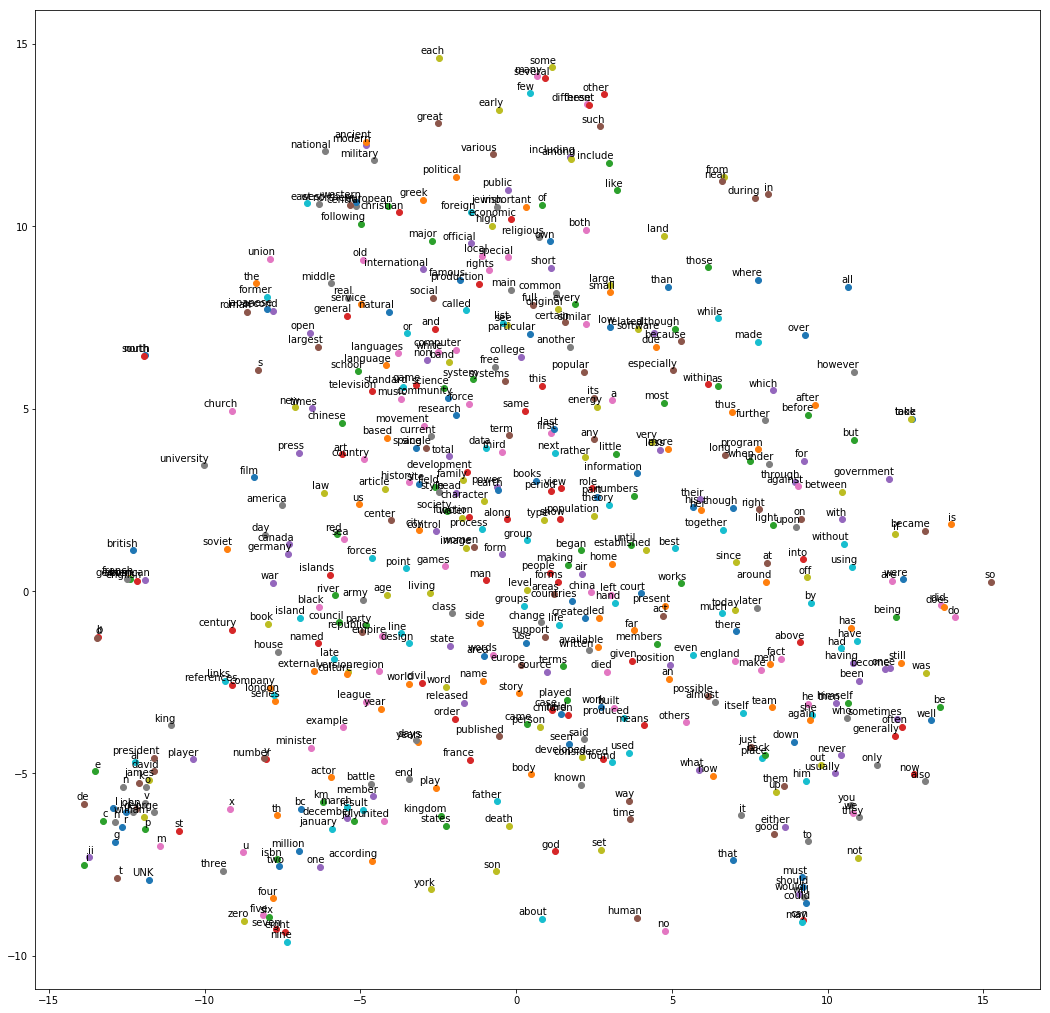

In [650]:
# Step 6: embeddings 시각화

def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'

    plt.figure(figsize=(18, 18))        # in inches

    # 원본 코드.
    # 해당 좌표에 점을 표시하고, 오른쪽/하단 정렬로 단어를 표시한다.
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i]

        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    # 재구성한 코드
    # for (x, y), label in zip(low_dim_embs, labels):
    #     plt.scatter(x, y)
    #     plt.annotate(label,
    #                  xy=(x, y),
    #                  xytext=(5, 2),
    #                  textcoords='offset points',
    #                  ha='right',
    #                  va='bottom')

    plt.savefig(filename)

try:
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt

    # low_dim_embs 내부 갯수와 n_components가 같아야 한다.
    # n_components : 차원. default는 2.
    # perplexity : 가장 가까운 이웃 갯수. 보통 5~50. default는 30.
    # n_iter : 최적화에 사용할 반복 횟수. 최소 200. default는 1000.
    # init : embedding 초기화 방법. random과 pca 중에서 선택. pca가 보다 안정적. default는 random.
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

    # plot 갯수. 50000개의 embeddings로부터 앞쪽 일부만 사용.
    # low_dim_embs에는 변환된 좌표 x, y가 들어있다.
    plot_only = 500
    low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only])     # (500, 2)
    labels = ordered_words[:plot_only]                                  # 재구성한 코드
    # labels = [ordered_words[i] for i in range(plot_only)]             # 원본 코드

    plot_with_labels(low_dim_embs, labels)

except ImportError:
    print('Please install sklearn, matplotlib, and scipy to show embeddings.')


In [584]:
vocabulary_size = 50000


def build_dataset(words, n_words):
    # count : [['UNK', -1], ('the', 1061396), ('of', 593677), ('and', 416629), ...]
    # 크기는 50,000개. UNK가 들어 있고, -1을 뺐으니까 처음에 전달된 크기 사용.
    # 빈도가 높은 5만개 추출.
    # count에 포함된 마지막 데이터는 ('hif', 9). 9번 나왔는데 드물다고 얘기할 수 있는지는 의문.
    unique = collections.Counter(words)             # 중복 단어 제거
    orders = unique.most_common(n_words - 1)        # 단어에 대한 빈도 계산. 갯수를 지정하지 않으면 전체 계산.
    count = [['UNK', -1]]
    count.extend(orders)

    # dictionary : (UNK, 0) (the, 1) (of, 2) (and, 3) (one, 4) (in, 5) (a, 6) (to, 7)
    # 내용을 보면 단어에 번호를 매겼다는 것을 알 수 있다.
    dictionary = {}
    for word, _ in count:
        dictionary[word] = len(dictionary)

    # 위의 코드는 결국 0부터 1씩 증가하는 인덱스를 len(dictionary)로 표현했기 때문에
    # enumerate 함수를 사용한 아래처럼 표현할 수 있다. len(dictionary)는 코드가 모호하다.
    # for i, (word, _) in enumerate(count):
    #     dictionary[word] = i

    # dictionary = {word: i for i, (word, _) in enumerate(count)}

    # 단어 전체에 대해 인덱스 매핑. data는 단어를 가리키는 인덱스 리스트가 된다.
    # 인덱스를 계산하기 위해 딕셔너리 대신 리스트를 사용할 수도 있고, 얼핏 보면 좋아보일 수도 있다.
    # 리스트를 사용하면 이진 검색을 적용해야
    data = []
    for word in words:
        if word in dictionary:          # word가 dictionary에 존재한다면
            index = dictionary[word]
        else:
            index = 0                   # UNK는 0번째에 위치
            count[0][1] += 1            # 갯수 : 418391
        data.append(index)

    # dictionary와 reversed_dictionary 내용
    # 일련번호로 된 key와 value가 의미 있을까? 리스트로 처리하면 되지 않을까?
    # (UNK, 0) (the, 1) (of, 2) (and, 3) (one, 4) (in, 5) (a, 6) (to, 7) (zero, 8) (nine, 9) (two, 10)
    # (0, UNK) (1, the) (2, of) (3, and) (4, one) (5, in) (6, a) (7, to) (8, zero) (9, nine) (10, two)
    # reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))

    # reversed_dictionary는 0부터 시작하는 일련번호를 갖기 때문에 딕셔너리로 만들면 오히려 어렵고 불편하다.
    # 아래 코드는 리스트와 같다는 것을 증명하는 코드.
    # a = list(dictionary.values())
    # print(type(a), len(a))
    # print(a[0], a[-1])
    #
    # b = list(range(len(dictionary.values())))
    # print(b[0], b[-1])
    #
    # assert a == b

    # reversed_dictionary 대신 key로 구성된 리스트 반환.
    # [(0, UNK) (1, the) (2, of) (3, and) (4, one)]에서 인덱스를 제외하고 구성한 리스트.
    # 원본에서는 dictionary 변수를 반환하고 있는데, 사용하지 않기 때문에 삭제.
    return data, count, list(dictionary.keys())

# data : 단어에 대한 인덱스만으로 구성된 리스트
# count : 단어와 빈도 쌍으로 구성된 리스트. 중요한 변수이지만, 이번 코드에서는 사용 안함.
# ordered_words : 빈도에 따라 정렬된 단어 리스트
data, count, ordered_words = build_dataset(vocabulary, vocabulary_size)

# print('Most common words (+UNK)', count[:5])
# print('Sample data', data[:10], [ordered_words[i] for i in data[:10]], sep='\n')
# print('-'*50)
  # 사용하지 않는 변수 삭제

# [출력 결과]
# Most common words (+UNK) [['UNK', 418390], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
# Sample data
# [5234, 3081, 12, 6, 195, 2, 3134, 46, 59, 156]
# ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']

